In [477]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

import random

In [478]:
s = 'colorless'
s_new = s[0:4]+'u'+s[4:]
s_new

'colourless'

In [479]:
'airplanes'[:-1]

'airplane'

#### ???

In [480]:
string = 'abcdefghijklmnopqrstuvwxyz'
string[0:10:2]

'acegi'

Reverse

In [481]:
string[25:10:-2]

'zxvtrpnl'

In [482]:
string[::-1]

'zyxwvutsrqponmlkjihgfedcba'

In [483]:
sentence = 'This is a good day!'
sentence[::-1]

'!yad doog a si sihT'

In [484]:
import urllib2

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urllib2.urlopen(url).read().decode('utf8')

In [485]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()

In [486]:
tokens = word_tokenize(raw)
tokens[:10]

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'to",
 u'die',
 u'out',
 u'in']

In [487]:
file_1 = open('nltk_chap3_ex.txt', 'w')
file_1.write("The 1st line of the file. ")
file_1.close()

In [488]:
file_1 = open('nltk_chap3_ex.txt', 'a') # "a" means append. This will not overwrite the original content.
file_1.write("World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.")
file_1.close()

In [489]:
file_1 = open('nltk_chap3_ex.txt', 'r')
raw = file_1.read()
file_1.close()
raw

'The 1st line of the file. World creates the power of nature, but not intelligence. Nor do we know if aliens really exist.'

In [490]:
pattern = '''
(?x)
'''
nltk.regexp_tokenize(pattern, raw)

[]

In [491]:
raw = "Not too long ago this is the only place where things are right."
raw.split('o')

['N',
 't t',
 '',
 ' l',
 'ng ag',
 ' this is the ',
 'nly place where things are right.']

In [492]:
raw.split(' ')

['Not',
 'too',
 'long',
 'ago',
 'this',
 'is',
 'the',
 'only',
 'place',
 'where',
 'things',
 'are',
 'right.']

In [493]:
raw = 'Last.'
for character in raw:
    print character

L
a
s
t
.


In [494]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
word_list.sort()
word_list

['ask', 'ninja', 'supernova', 'tesla']

In [495]:
word_list = ['ask', 'tesla', 'ninja' ,'supernova']
sorted(word_list)

['ask', 'ninja', 'supernova', 'tesla']

In [496]:
word_list

['ask', 'tesla', 'ninja', 'supernova']

15

In [497]:
print 3 * 7

21


In [498]:
print "3" * 7

3333333


In [499]:
print str(3)*7

3333333


In [500]:
print int("3")*7

21


16.

In [501]:
with open("prog.py",'w') as prog:
    prog.write("monty = 'Monty Python'")
    
prog.close()

In [502]:
from prog import monty

In [503]:
monty

'Monty Python'

17.

In [504]:
'{:6}'.format('thisisalongstring')

'thisisalongstring'

If the string is longer than assigned length, it shows everything.

In [505]:
'{:6}'.format('if')

'if    '

In [506]:
'{:>6}'.format('if')

'    if'

18.

Here let's take the inauguration speech

In [507]:
from nltk.corpus import inaugural

Let's count the "wh-" words in all the inauguration files.

In [508]:
fd = nltk.FreqDist(
                                word
                                for file_ in inaugural.fileids()
                                for word in inaugural.words(file_)
                                if re.search('^wh.*', word.lower()) 
)
fd.most_common(20)

[(u'which', 1002),
 (u'who', 356),
 (u'when', 162),
 (u'what', 143),
 (u'whole', 90),
 (u'whose', 66),
 (u'where', 62),
 (u'whether', 46),
 (u'while', 45),
 (u'When', 41),
 (u'whom', 39),
 (u'While', 31),
 (u'whatever', 25),
 (u'What', 23),
 (u'wherever', 15),
 (u'why', 13),
 (u'whilst', 11),
 (u'wholly', 9),
 (u'white', 8),
 (u'whenever', 8)]

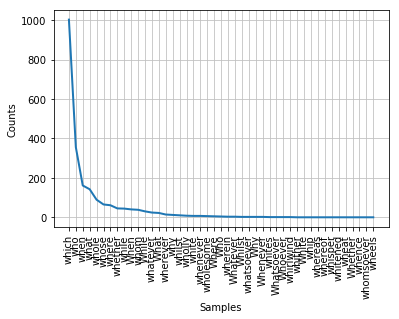

In [509]:
fd.plot()

20.

In [510]:
url = 'https://en.wikipedia.org/wiki/Basketball'

raw = urllib2.urlopen(url).read().decode('utf8')


The next step is important: tokenize the raw material from online

In [511]:
tokens = word_tokenize(raw)
tokens[:10]

[u'<',
 u'!',
 u'DOCTYPE',
 u'html',
 u'>',
 u'<',
 u'html',
 u'class=',
 u"''",
 u'client-nojs']

Or, use BeautifulSoup to get the text

In [512]:
from bs4 import BeautifulSoup

In [513]:
text = BeautifulSoup(raw).get_text()
text[:10]

u'\n\n\nBasketb'

In [514]:
tokens = word_tokenize(text)
tokens[:10]

[u'Basketball',
 u'-',
 u'Wikipedia',
 u'document.documentElement.className',
 u'=',
 u'document.documentElement.className.replace',
 u'(',
 u'/',
 u'(',
 u'^|\\s']

21.

In [515]:
word_list_english = nltk.corpus.words.words('en')
word_list_english[:5]

[u'A', u'a', u'aa', u'aal', u'aalii']

!!! Use .isalpha() to filter words only

In [516]:
word_only_list_web = [word for word in tokens if word.isalpha()]
word_only_list_web[:10]

[u'Basketball',
 u'Wikipedia',
 u'function',
 u'wgCanonicalNamespace',
 u'wgCanonicalSpecialPageName',
 u'false',
 u'wgNamespaceNumber',
 u'wgPageName',
 u'Basketball',
 u'wgTitle']

In [517]:
word_not_in_corpus = [word.lower() for word in word_only_list_web 
                      if word.lower() not in word_list_english]
word_not_in_corpus[:10]

[u'wikipedia',
 u'wgcanonicalnamespace',
 u'wgcanonicalspecialpagename',
 u'wgnamespacenumber',
 u'wgpagename',
 u'wgtitle',
 u'wgcurrevisionid',
 u'wgrevisionid',
 u'wgarticleid',
 u'wgisarticle']

In [518]:
fd = nltk.FreqDist(word_not_in_corpus)
fd.most_common(20)

[(u'players', 66),
 (u'games', 59),
 (u'retrieved', 57),
 (u'women', 54),
 (u'rules', 53),
 (u'teams', 51),
 (u'nba', 50),
 (u'fiba', 46),
 (u'played', 44),
 (u'states', 26),
 (u'articles', 26),
 (u'july', 26),
 (u'american', 24),
 (u'feet', 24),
 (u'has', 23),
 (u'naismith', 23),
 (u'called', 23),
 (u'dribbling', 21),
 (u'leagues', 21),
 (u'archived', 20)]

Most words are in a slightly different form compared with corpus words. e.g. player vs. players, etc.

Sort the result. Sorting result in the nltk.FreqDist as follow:

In [519]:
fd_sorted = sorted(fd, key=fd.get, reverse=True)

19.

In [520]:
freq_list = []

with open('chap3_ex19.txt', 'r') as f:
    for line in f:
        freq_list.append(list([line.split(' ')[0], line.split(' ')[1]]))
        
freq_list

[['goose', '1\n'],
 ['tampa', '52\n'],
 ['astronaut', '109\n'],
 ['elephant', '8\n'],
 ['naruto', '827\n'],
 ['trombone', '3\n']]

22.

In [521]:
url = "http://news.bbc.co.uk/"

raw = urllib2.urlopen(url).read().decode('utf8')
text = BeautifulSoup(raw).get_text()
text[:10]

u'\n\n\n\nHome -'

Make sure tokenize text before do anything

In [522]:
tokens = word_tokenize(text)
tokens[:10]

[u'Home', u'-', u'BBC', u'News', u'{', u'``', u'@', u'context', u"''", u':']

In [523]:
text_only = [word for word in text if word.isalpha()]
text_only[:10]

[u'H', u'o', u'm', u'e', u'B', u'B', u'C', u'N', u'e', u'w']

In [524]:
letters_only = [letter for letter in tokens if letter.isalpha()]
letters_only[:10]

[u'Home',
 u'BBC',
 u'News',
 u'context',
 u'http',
 u'type',
 u'WebPage',
 u'url',
 u'http',
 u'publisher']

23.

#### The key to use regular expression for splitting is to put square brackets and use "|" to separate the delimiters/ words that you want to use to split the sentence.

In [525]:
sent = '''pleae ! this * saa * sdasd! sdasd ! sd shi ^ sdisa, not a 
& not * not not() use it !$* sdsa'''
re.split('[!|*|not]',sent)

['pleae ',
 ' ',
 'his ',
 ' saa ',
 ' sdasd',
 ' sdasd ',
 ' sd shi ^ sdisa, ',
 '',
 '',
 ' a \n& ',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '() use i',
 ' ',
 '$',
 ' sdsa']

25.

Let's first try to find the first vowel in a string

In [526]:
vowels = ['a','e','i','o','u']

def find_position(word):
    for letter in string:
        if letter in vowels:
            position = string.index(letter)
    return position
     

Now re-construct the word

In [527]:
string='whomwhatever'
re.search('[aeiou]',string)

In [528]:
string='whomwhatever'
new_string = string[find_position(string):]+string[:find_position(string)]
new_string

'everwhomwhat'

27.

In [529]:
random.choice('aeiou')

'i'

To do something N times, use the itertools. The details are in my personal Github page:
https://github.com/thatMeow/My_Python_Skills_Collections/blob/master/Miscellaneous/Iterations/do_something_n_times.py

In [530]:
import itertools

string = 'aehh'

list_=[]

for _ in itertools.repeat(None, 500):
    list_.append(random.choice(string))
    
    
result = ''.join(list_)
result

'ehehahhheehaehhhehhaahahehaahehheahhehehhehhahhhhehhehhaahhaaaaahehhaeaehaaehehhheehhhhaaheaehheaaehehehhhhhaeeaheehaehhhhhhhaehaeheaheaeehaaahahehhehhhaeeaeahahhhaehhheahehhhhhheahaehheehehehhahheheaahhhaahahahhhhehahheehhehaeeaahhaeaeeeaahaaeheeeaaaehhhhhheahehehaahahheaeheehheehhhhaaheeahhhhhehhhhaehaehhheeheheahhahahahahhahhahhhahahaahehhaaaaeaaaahhhaaaeehahehahhhhehhaahhheeeeheaaehhehhahhhheheeeeeaheehehhhhaahheaahhhaeehaahhhahhhhaeaahhheahhhhaeeaeaaehaheehehehaheaeeeeheeahahahheaeehhaheaea'

In [531]:
for letter in 'aeh':
    print "Number of letter "+ letter + " is: " + str(result.count(letter))

Number of letter a is: 130
Number of letter e is: 134
Number of letter h is: 236


29.

Let's get the brown corpus in nltk first:

In [532]:
from nltk.corpus import brown

My personal Github page of nltk book, chapter 2, contains the syntax to import nltk corpus and check files, get words, etc.:
https://github.com/thatMeow/Natural-Language-Processing/blob/master/NLTK_Book/2%20-%20Accessing%20Text%20Corpora%20and%20Lexical%20Resources.ipynb

In [533]:
brown.fileids()[:5]

[u'ca01', u'ca02', u'ca03', u'ca04', u'ca05']

In [534]:
for file_ in brown.fileids()[-3:]:
    print file_, len(brown.words(file_))

cr07 2456
cr08 2371
cr09 2332


Let's check the first file and see the words in it.

In [535]:
sample_words = brown.words('ca01')
sample_words

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

### Count number of chapters, sentences, and words in the last 3 files

In [536]:
for file_ in brown.fileids()[-3:]:
    print "File name: ", file_
    print "Number of raw content: ", len(brown.raw(file_))
    print "Number of sentences: ", len(brown.sents(file_))
    print "Number of words: ", len(brown.words(file_))
    print "Number of unique words: ", len(set(brown.words(file_)))
    print "\n"

File name:  cr07
Number of raw content:  19973
Number of sentences:  184
Number of words:  2456
Number of unique words:  724


File name:  cr08
Number of raw content:  20608
Number of sentences:  70
Number of words:  2371
Number of unique words:  1067


File name:  cr09
Number of raw content:  19645
Number of sentences:  99
Number of words:  2332
Number of unique words:  1072




In [537]:
for file_ in brown.fileids()[-3:]:
    print "File name: ", file_
    print "Number of characters per word: ", len(brown.raw(file_))/len(brown.words(file_))
    print "Number of words per sentence: ", len(brown.words(file_))/len(brown.sents(file_))
    print "ARI for file " + file_ + " is: ", 4.71*(len(brown.raw(file_))/len(brown.words(file_)))+(len(brown.words(file_))/len(brown.sents(file_)))-21.43
    print "\n"

File name:  cr07
Number of characters per word:  8
Number of words per sentence:  13
ARI for file cr07 is:  29.25


File name:  cr08
Number of characters per word:  8
Number of words per sentence:  33
ARI for file cr08 is:  49.25


File name:  cr09
Number of characters per word:  8
Number of words per sentence:  23
ARI for file cr09 is:  39.25




30.

Porter and Lancaster Stemmer can be found in my personal Github page:
https://github.com/thatMeow/Natural-Language-Processing/blob/master/NLTK_Book/3%20-%20Processing%20Raw%20Text%20-%20Part%202.ipynb

First let's get the Porter and Lancaster Stemmers:

In [538]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

Now let's write a sentence and tokenize it:

In [539]:
sent = '''
        Writing some words that can use stemmers: lying on the ground 
        and counting stars. Men and women, American or Chinese.
        '''        

In [540]:
tokens = word_tokenize(sent)

Now apply stemmers:

In [541]:
[porter.stem(word) for word in tokens]

[u'write',
 'some',
 u'word',
 'that',
 'can',
 'use',
 u'stemmer',
 ':',
 u'lie',
 'on',
 'the',
 'ground',
 'and',
 u'count',
 u'star',
 '.',
 'men',
 'and',
 'women',
 ',',
 'american',
 'or',
 u'chines',
 '.']

In [542]:
[lancaster.stem(word) for word in tokens]

['writ',
 'som',
 'word',
 'that',
 'can',
 'us',
 'stem',
 ':',
 'lying',
 'on',
 'the',
 'ground',
 'and',
 'count',
 'star',
 '.',
 'men',
 'and',
 'wom',
 ',',
 'am',
 'or',
 'chines',
 '.']

31.

In [543]:
word_list = ['After', 'all', 'is', 'said', 'and', 'done', ',', 'more',
'is', 'said', 'than', 'done', '.']

length_list = []

for word in word_list:
    length_list.append(len(word))
length_list

[5, 3, 2, 4, 3, 4, 1, 4, 2, 4, 4, 4, 1]

In [544]:
length_list = []

[length_list.append(len(word)) for word in word_list]
length_list

[5, 3, 2, 4, 3, 4, 1, 4, 2, 4, 4, 4, 1]

32.

In [545]:
silly = 'newly formed bland ideas are inexpressible in an infuriating way'

a. Split silly into a list of strings, one per word, using Python's split() operation, and save this to a variable called  bland.

In [546]:
bland = silly.split()
bland

['newly',
 'formed',
 'bland',
 'ideas',
 'are',
 'inexpressible',
 'in',
 'an',
 'infuriating',
 'way']

b. Extract the second letter of each word in silly and join them into a string, to get 'eoldrnnnna'.

In [547]:
second_letter = ''
for word in bland:
    second_letter += word[1]
second_letter

'eoldrnnnna'

c. Combine the words in bland back into a single string, using join(). Make sure the words in the resulting string are separated with whitespace.

In [548]:
new_bland = ' '.join(bland)
new_bland

'newly formed bland ideas are inexpressible in an infuriating way'

!!!d. Print the words of silly in alphabetical order, one per line.

In [549]:
string = 'abcdefg'
string.find('e')

4

In [550]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
for word in bland:
    print word, alphabet.find(word[0]), alphabet.find(word[1])

newly 13 4
formed 5 14
bland 1 11
ideas 8 3
are 0 17
inexpressible 8 13
in 8 13
an 0 13
infuriating 8 13
way 22 0


In [551]:
sorted(bland)

['an',
 'are',
 'bland',
 'formed',
 'ideas',
 'in',
 'inexpressible',
 'infuriating',
 'newly',
 'way']